# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from functools import partial
from scipy.optimize import fmin
import torch
import os, glob

from indentation.indentationset import IndentationSet
from indentation.processing.find_contact import findContact_minimum, findContact_blackMagic, findContact_blackMagic_CNN
from indentation.processing.signal import do_nothing, crop
from indentation.processing.calculate_parameters import parameter_youngs_modulus, parameter_defelection_sensitivity
from indentation.processing.plotting import plot_curve_parameters_bar, plot_instance_parameters_bar, plot_mean_force_curves
from indentation.ml.models import ConvClassifier_1, ConvClassifier_2

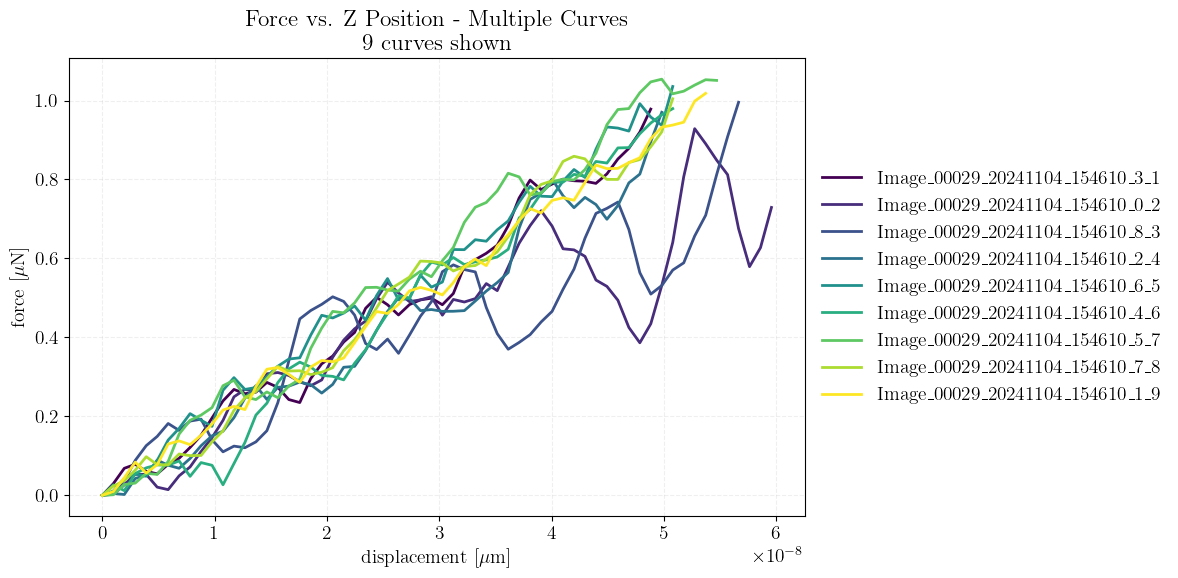

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [22]:
paths = glob.glob(r"example_data/calibration/*.txt")


afm = IndentationSet(paths, exp_type="afmcalib")

processing_pl = [crop, findContact_minimum]

afm.process_raw(processing_pl)

afm.plot_all()

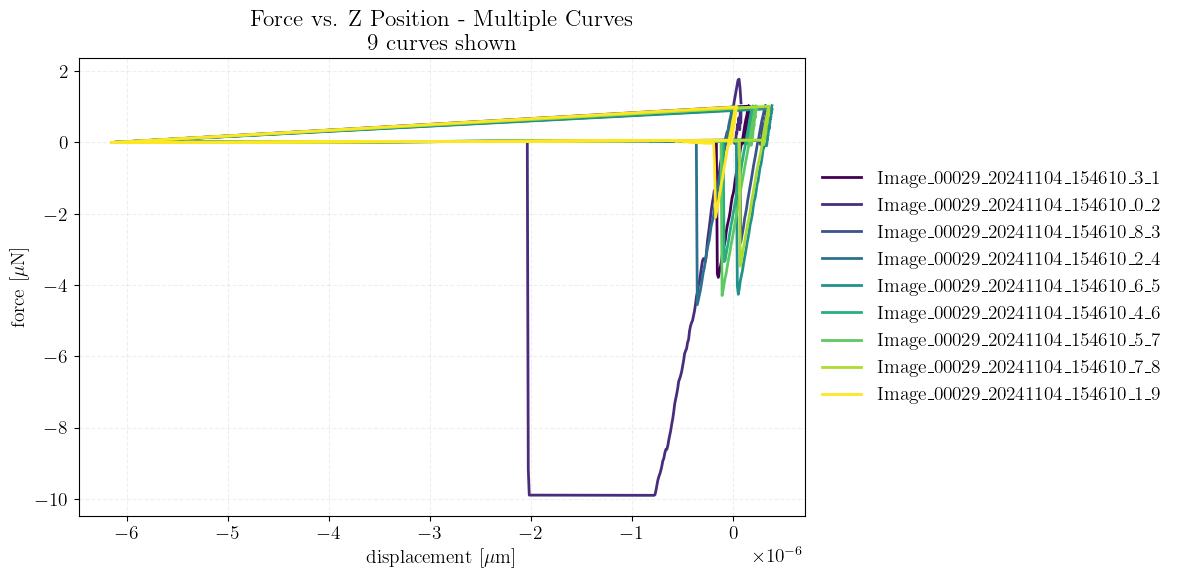

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Force vs. Z Position - Multiple Curves\n9 curves shown'}, xlabel='displacement [$\\mu$m]', ylabel='force [$\\mu$N]'>)

In [23]:
afm.plot_all_raw()

49.913335746323995
81.70651381948052
56.898188490076336
51.333962105096546
49.04256010487336
51.85510912697906
52.04009563107346
50.558468782455215
52.758140221466
Mean and std: 55.122930447536056 9.631629476536343


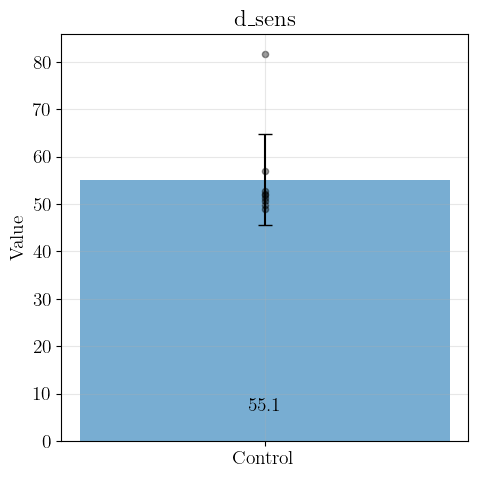

In [24]:
function_arguments = dict(keyname="d_sens")
afm.calculate_curve_parameter(function=parameter_defelection_sensitivity)
plot_curve_parameters_bar(afm,
                         parameter_names=["d_sens"],
                         labels=['Control'],
                         figsize=(5,5))

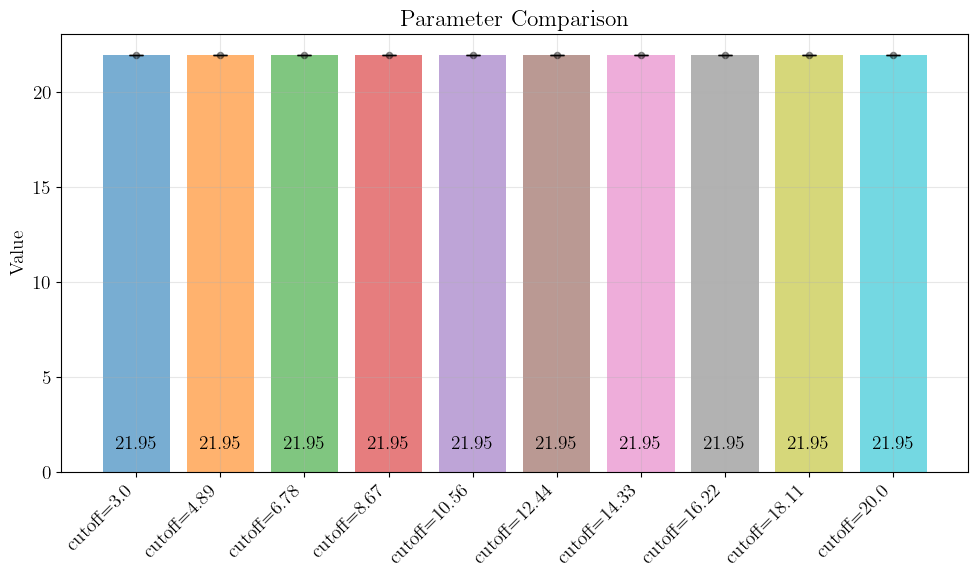

In [11]:
cutoffs = np.linspace(3, 20, 10)

for cutoff in cutoffs:
    function_arguments = dict(radius=5, nu=0.5, cutoff=cutoff, keyname="cutoff="+str(np.round(cutoff, 2)))
    afm.calculate_curve_parameter(function=parameter_youngs_modulus, **function_arguments)

plot_instance_parameters_bar(afm,
                         parameter_names=[*["cutoff="+str(np.round(cutoff, 2)) for cutoff in cutoffs]],
                         figsize=(10,6))